In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Dataset
X = np.array([[25, 30], [30, 50], [35, 60], [40, 80], [28, 45], [45, 90], [50, 100], [27, 40]])
y = np.array([0, 0, 1, 1, 0, 1, 1, 0])

In [4]:
# Train models
tree = DecisionTreeClassifier(max_depth=3 , random_state=42)
tree.fit(X,y)
rf = RandomForestClassifier(n_estimators=10 , random_state=42)
rf.fit(X,y)

RandomForestClassifier(n_estimators=10, random_state=42)

In [5]:
# print accuracy scores
tree_accuracy = accuracy_score(y, tree.predict(X))
rf_accuracy = accuracy_score(y, rf.predict(X))
print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00


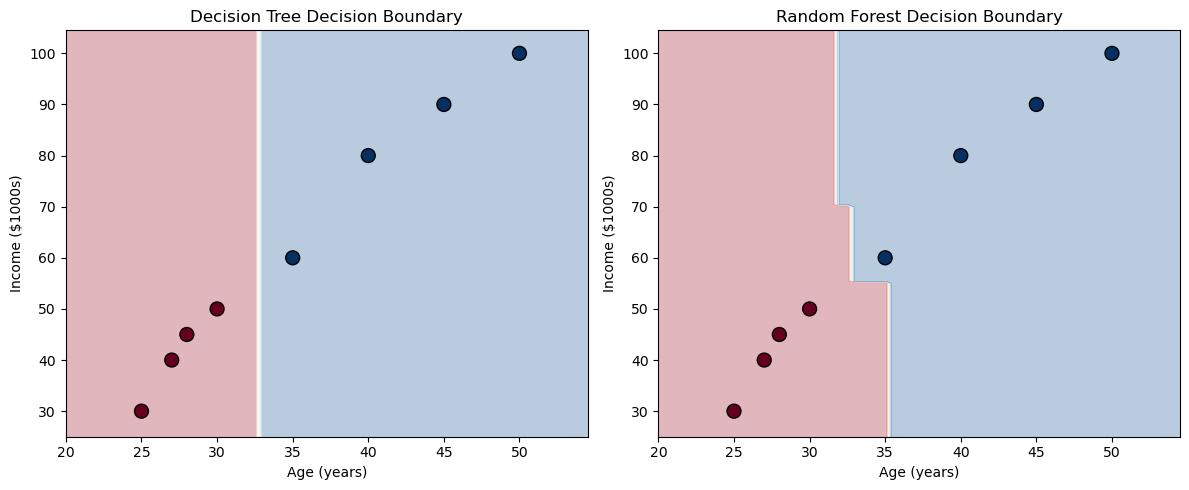

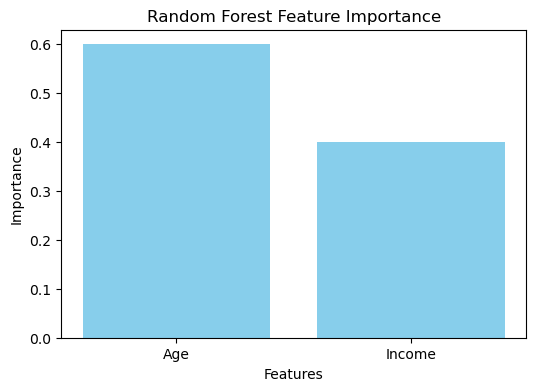

In [6]:
# Visualize decision boundaries
h = 0.5  # Mesh step size
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot for Decision Tree
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
Z_tree = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z_tree = Z_tree.reshape(xx.shape)
plt.contourf(xx, yy, Z_tree, cmap='RdBu', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolors='k', s=100)
plt.xlabel('Age (years)')
plt.ylabel('Income ($1000s)')
plt.title('Decision Tree Decision Boundary')

# Plot for Random Forest
plt.subplot(1, 2, 2)
Z_rf = rf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rf = Z_rf.reshape(xx.shape)
plt.contourf(xx, yy, Z_rf, cmap='RdBu', alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolors='k', s=100)
plt.xlabel('Age (years)')
plt.ylabel('Income ($1000s)')
plt.title('Random Forest Decision Boundary')
plt.tight_layout()
plt.show()

# Feature importance for Random Forest
plt.figure(figsize=(6, 4))
plt.bar(['Age', 'Income'], rf.feature_importances_, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()